In [1]:
#data preprocessing
import pandas as pd

In [2]:
# Read data and drop redundant column.
data = pd.read_csv('https://raw.githubusercontent.com/dollcg24/diabetes_dataset/master/data.csv')

# Preview data.
display(data.head(5))

,gender,age,bmi,heredity,calorie,sleep,bp,smoke,alcohol,mental,physical,skin,pcos,risk
0,f,B,overweight,y,y,regular,normal,y,y,y,n,y,y,h
1,m,B,normal,y,n,irregular,normal,y,y,n,n,n,n,m
2,f,B,normal,n,n,regular,high,n,n,n,y,n,n,l
3,f,C,normal,y,n,regular,normal,y,y,y,n,n,n,m
4,m,B,normal,n,n,regular,low,n,y,n,y,n,n,l


In [4]:
from sklearn import preprocessing

In [5]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()

In [6]:
from sklearn import preprocessing
#diab = pd.read_csv("diabrisk.csv")
preprocess = preprocessing.LabelEncoder()
data['gender'] = preprocess.fit_transform(data['gender'])
data['age'] = preprocess.fit_transform(data['age'])
data['bmi'] = preprocess.fit_transform(data['bmi'])
data['heredity']= preprocess.fit_transform(data['heredity'])
data['calorie'] = preprocess.fit_transform(data['calorie'])
data['sleep'] = preprocess.fit_transform(data['sleep'])
data['bp'] = preprocess.fit_transform(data['bp'])
data['smoke'] = preprocess.fit_transform(data['smoke'])
data['alcohol'] = preprocess.fit_transform(data['alcohol'])
data['mental'] = preprocess.fit_transform(data['mental'])
data['physical'] = preprocess.fit_transform(data['physical'])
data['skin'] = preprocess.fit_transform(data['skin'])
data['pcos'] = preprocess.fit_transform(data['pcos'])
data['risk'] = preprocess.fit_transform(data['risk'])
data.head(5)

,gender,age,bmi,heredity,calorie,sleep,bp,smoke,alcohol,mental,physical,skin,pcos,risk
0,0,2,2,2,3,1,3,1,2,1,1,4,3,0
1,2,2,0,2,2,0,3,1,2,0,1,2,1,2
2,0,2,0,0,2,1,0,0,0,0,3,2,1,1
3,0,4,0,2,2,1,3,1,2,1,1,2,1,2
4,2,2,0,0,2,1,2,0,2,0,3,2,1,1


In [8]:
feature_columns = ['gender','age','bmi','heredity','calorie','sleep','bp','smoke','alcohol','mental','physical','skin','pcos']
predicted_class = ['risk']
X = data[feature_columns].values
y = data[predicted_class].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create the model with 180 trees
#model is object of classifier
model = RandomForestClassifier(n_estimators=180, random_state=10)
model.fit(X_train,y_train.ravel())
random_pred=model.predict(X_test)
print("Random forest : ",accuracy_score(y_test,random_pred, normalize = True))

Random forest :  0.9696312364425163


In [14]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, random_pred)
print(cm)


[[252   1   2]
 [  0 234  13]
 [  8   4 408]]


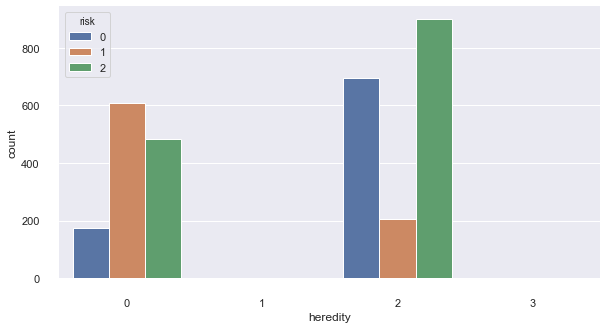

In [18]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
#setting the plot size for all plots
sns.set(rc={'figure.figsize':(9.7,5)})
# create a countplot
sns.countplot('heredity',data=data,hue = 'risk')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()
#risk:
#0(high),1(low),2(medium)
#heredity:
#0(no),1(yes)
#as seen in thye figure if heridity is yes then no of high risk(0-blue) patients is also more and igf heredity is no then no of low risk(1-brown is more)

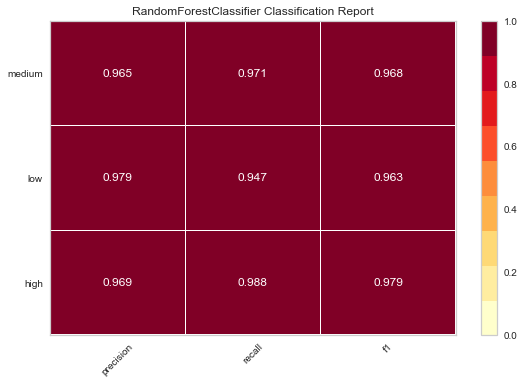

In [20]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
rf = ClassificationReport(model, classes=['high','low','medium'])
rf.fit(X_train, y_train) # Fit the training data to the visualizer
rf.score(X_test, y_test) # Evaluate the model on the test data
g = rf.poof() # Draw/show/poof the data

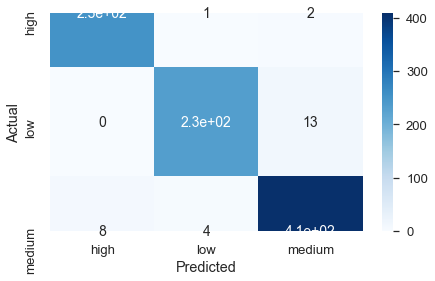

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,4))
sn.set(font_scale=1.2)#for label size
#predictions_test = le.inverse_transform(target)
#print(predictions_test)
x_axis_labels = ['high','low','medium'] # labels for x-axis
y_axis_labels = ['high','low','medium'] # labels for y-axis
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14},xticklabels=x_axis_labels, yticklabels=y_axis_labels)# font size

In [29]:
try:
    import dill as pickle
except ImportError:
    import pickle

In [32]:
filename = 'finalized_model.p'
pickl = {
    'model': model
}
#pickle.dump( pickl, open( 'finalized_model' + ".p", "wb" ) )
pickle.dump(model, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9696312364425163


In [35]:
Xnew=[]
l=[]
gender=input("Enter your gender, 'f' for female and 'm' for male :")
if(gender=='f'):
    l.append(0)
else:
    l.append(2)
    
age=input("Enter your age range 'A','B','C' :")
if(age=='B'):
    l.append(2)
elif(age=='C'):
    l.append(4)
else:
    l.append(0)
    
bmi=input("Enter your bmi category of 'overweight','normal','underweight','obese' :")
if(bmi=='overweight'):
    l.append(2)
elif(bmi=='normal'):
    l.append(0)
elif(bmi=='obese'):
    l.append(1)
else:
    l.append(3)
    
heredity=input("Enter 'y' if diabetes runs in your family else enter 'n' :")
if(heredity=='y'):
    l.append(2)
else:
    l.append(0)

calorie=input("Enter 'y' if high calorie food intake else enter 'n' :")
if(calorie=='y'):
    l.append(3)
else:
    l.append(2)

sleep=input("Enter 'regular' if sleep is regular else enter 'irregular' :")
if(sleep=='regular'):
    l.append(2)
else:
    l.append(0)


bp=input("Enter 'normal','low' or 'high' :")
if(bp=='normal'):
    l.append(4)
elif(bp=='high'):
    l.append(0)
else:
    l.append(2)

smoke=input("Enter 'y' if you smoke else enter 'n' :")
if(smoke=='y'):
    l.append(1)
else:
    l.append(0)

alcohol=input("Enter 'y' if you drink else enter 'n' :")
if(alcohol=='y'):
    l.append(2)
else:
    l.append(0)

mental=input("Enter 'y' if you have mental illness else enter 'n' :")
if(mental=='y'):
    l.append(1)
else:
    l.append(0)

physical=input("Enter 'y' if you exercise daily else enter 'n' :")
if(physical=='y'):
    l.append(3)
else:
    l.append(1)

skin=input("Enter 'y' if you have dark patches else enter 'n' :")
if(skin=='y'):
    l.append(4)
else:
    l.append(2)
pcos=input("Enter 'y' if you pcos else enter 'n' :")
if(pcos=='y'):
    l.append(3)
else:
    l.append(1)


    
# calorie=raw_input(" ")
# if(calorie==)
    
#l = list(map(int, raw_input("").split(",")))
Xnew.append(l)
print(Xnew)
#Xnew = [[2,2,0,2,2,0,4,1,2,0,1,2,1]]

Enter your gender, 'f' for female and 'm' for male :f
Enter your age range 'A','B','C' :B
Enter your bmi category of 'overweight','normal','underweight','obese' :overweight
Enter 'y' if diabetes runs in your family else enter 'n' :n
Enter 'y' if high calorie food intake else enter 'n' :y
Enter 'regular' if sleep is regular else enter 'irregular' :regular
Enter 'normal','low' or 'high' :regular
Enter 'y' if you smoke else enter 'n' :y
Enter 'y' if you drink else enter 'n' :y
Enter 'y' if you have mental illness else enter 'n' :n
Enter 'y' if you exercise daily else enter 'n' :n
Enter 'y' if you have dark patches else enter 'n' :y
Enter 'y' if you pcos else enter 'n' :y
[[0, 2, 2, 0, 3, 2, 2, 1, 2, 0, 1, 4, 3]]


In [37]:
ynew = model.predict(Xnew)
if(ynew[0]==0):
    print("You are at HIGH risk")
    print("See a doctor as soon as possible")
if(ynew[0]==1):
    print("You are at LOW risk")
    print("You are doing well,continue with you healthy lifestyle")
if(ynew[0]==2):
    print("You are at MEDIUM risk")
    print("You can change some of your lifestyle habbits to lower the risk.")

You are at MEDIUM risk
You can change some of your lifestyle habbits to lower the risk.
